In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt


In [2]:
movies=pd.read_csv(r"/kaggle/input/movielens-dataset/movies.csv")
rating=pd.read_csv(r"/kaggle/input/movielens-dataset/ratings.csv")

In [8]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
rating

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523
...,...,...,...,...
105334,668,142488,4.0,1451535844
105335,668,142507,3.5,1451535889
105336,668,143385,4.0,1446388585
105337,668,144976,2.5,1448656898


In [5]:
movies.describe()

,movieId
count,10329.000000
mean,31924.282893
std,37734.741149
min,1.000000
25%,3240.000000
50%,7088.000000
75%,59900.000000
max,149532.000000


In [6]:
rating.describe()

,userId,movieId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,364.924539,13381.312477,3.516850,1.130424e+09
std,197.486905,26170.456869,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1073.000000,3.000000,9.711008e+08
50%,383.000000,2497.000000,3.500000,1.115154e+09
75%,557.000000,5991.000000,4.000000,1.275496e+09
max,668.000000,149532.000000,5.000000,1.452405e+09


In [4]:
df=pd.merge(rating,movies,how='left',on='movieId')

In [8]:
df

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,1,24,1.5,1217895807,Powder (1995),Drama|Sci-Fi
2,1,32,4.0,1217896246,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,4.0,1217896556,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,4.0,1217896523,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
105334,668,142488,4.0,1451535844,Spotlight (2015),Thriller
105335,668,142507,3.5,1451535889,Pawn Sacrifice (2015),Drama
105336,668,143385,4.0,1446388585,Bridge of Spies (2015),Drama|Thriller
105337,668,144976,2.5,1448656898,Bone Tomahawk (2015),Horror|Western


In [9]:
filt_movie=df[df['genres'].str.contains("Crime")&(df['rating']>4)]

In [10]:
grope=filt_movie.groupby('title').agg({'rating':'mean','userId':'count'})
grope=grope.reset_index()

In [11]:
grope

,title,rating,userId
0,10th & Wolf (2006),4.500000,1
1,2 Days in the Valley (1996),5.000000,4
2,"2 Fast 2 Furious (Fast and the Furious 2, The)...",4.750000,2
3,21 (2008),4.666667,3
4,21 Grams (2003),4.700000,5
...,...,...,...
599,"X-Files: Fight the Future, The (1998)",4.833333,6
600,"Yards, The (2000)",5.000000,1
601,"Young Poisoner's Handbook, The (1995)",5.000000,2
602,Zodiac (2007),4.500000,4


# EDA

In [74]:
print(movies.head())
print("-"*40)
print(rating.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
----------------------------------------
   userId  movieId  rating   timestamp
0       1       16     4.0  1217897793
1       1       24     1.5  1217895807
2       1       32     4.0  1217896246
3       1       47     4.0  1217896556
4       1       50     4.0  1217896523


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


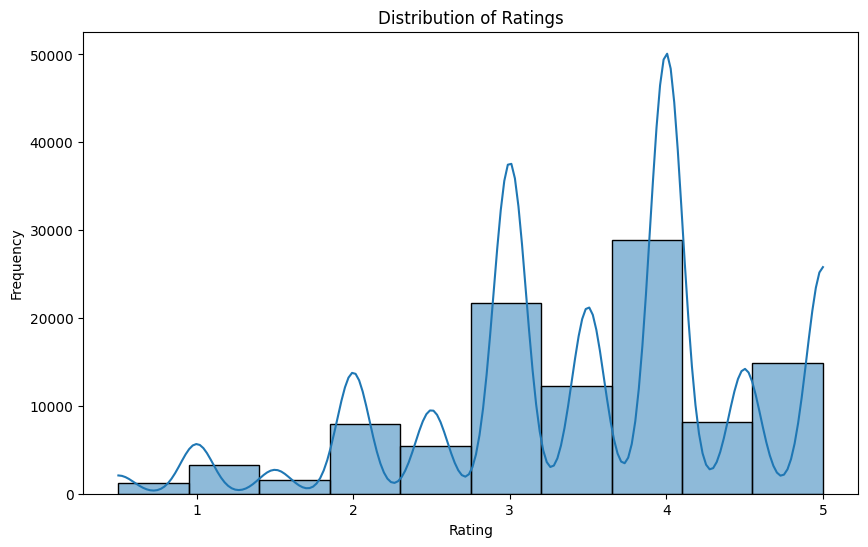

In [80]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(rating['rating'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [77]:
print(rating['userId'].unique())
print("-"*80)
print(rating['movieId'].unique())
print("-"*200)
print(len(rating['movieId'].unique()))

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 24

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='rating', ylabel='Count'>

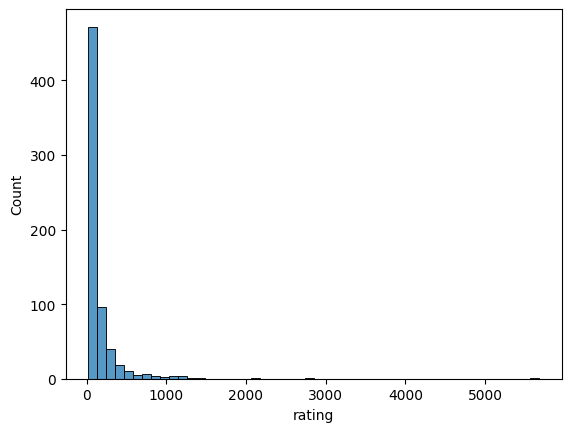

In [81]:
sns.histplot(rating.groupby('userId')['rating'].count(),bins=50)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


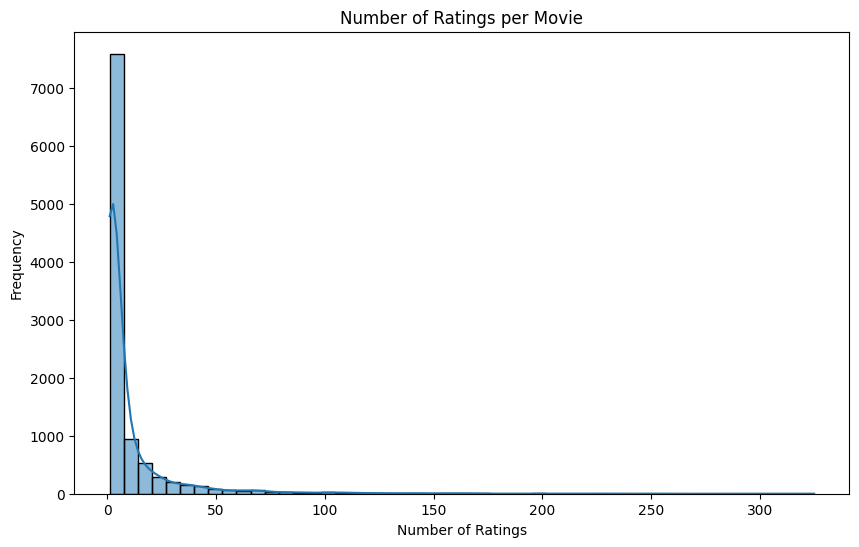

In [82]:
plt.figure(figsize=(10, 6))
sns.histplot(rating.groupby('movieId')['rating'].count(), bins=50, kde=True)
plt.title('Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()


Average Rating by Genre:
genres
(no genres listed)                     3.071429
Action                                 2.836406
Action|Adventure                       3.739804
Action|Adventure|Animation             4.125000
Action|Adventure|Animation|Children    3.550000
                                         ...   
Sci-Fi|Thriller|IMAX                   3.500000
Thriller                               3.473430
Thriller|War                           3.500000
War                                    3.613636
Western                                3.500000
Name: rating, Length: 938, dtype: float64

Total Movies by Genre: 938


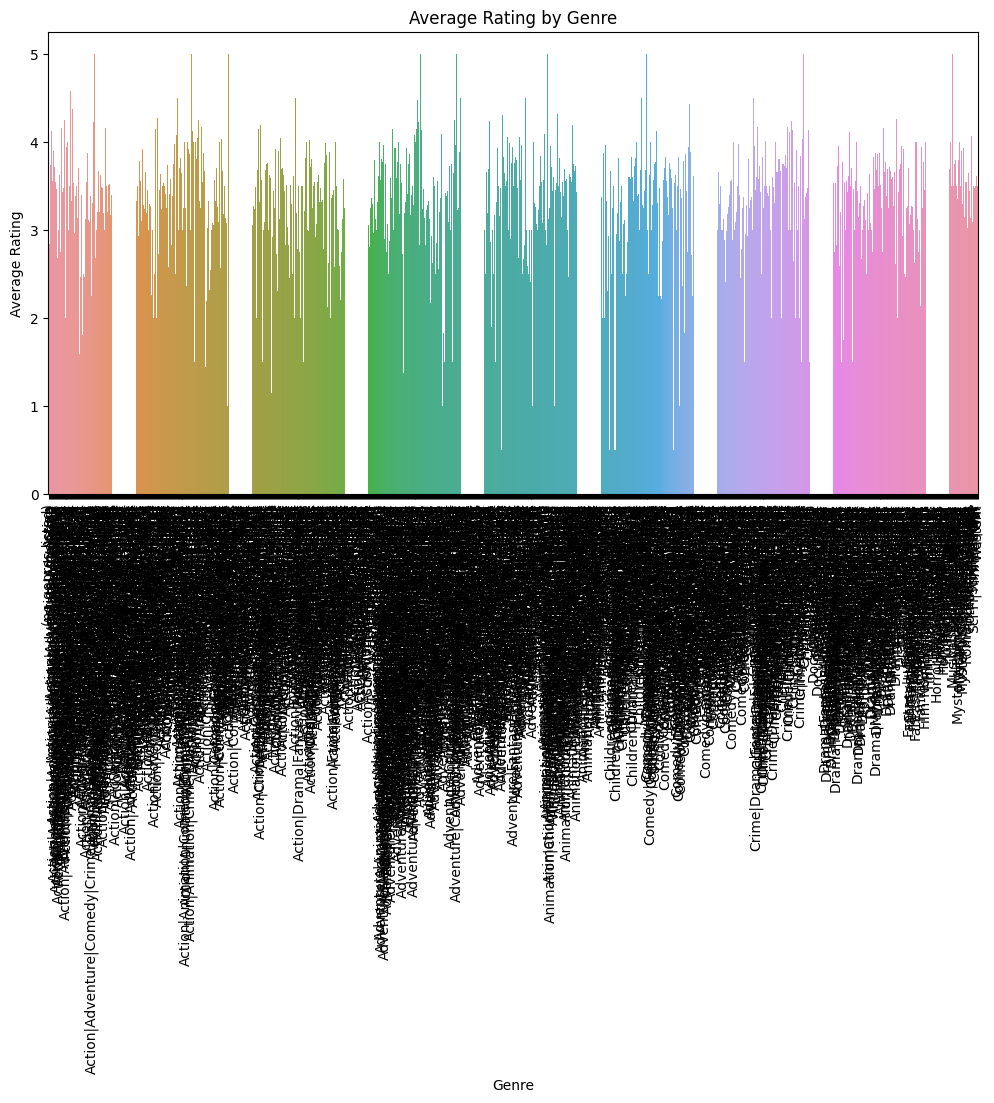

In [92]:
genre_avg_rating = df.groupby('genres')['rating'].mean()
total_movies_genre = movies['genres'].nunique()
print("\nAverage Rating by Genre:")
print(genre_avg_rating)
print("\nTotal Movies by Genre:", total_movies_genre)
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_avg_rating.index, y=genre_avg_rating.values)
plt.title('Average Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


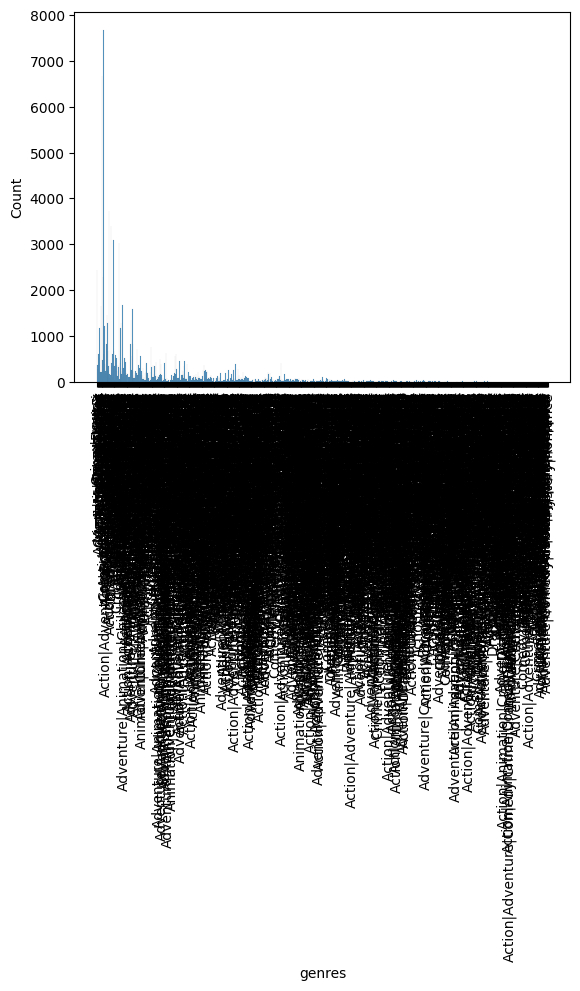

In [98]:
sns.histplot(df['genres'])
plt.xticks(rotation=90)
plt.show()


# POpularity Based

In [12]:
def popularity(genre,threshold,num_recom):
    filt_movie=df[df['genres'].str.contains(genre)&(df['rating']>threshold)]
    grouped=filt_movie.groupby('title').agg({'rating':'mean','userId':'count'}).reset_index()
    grouped.columns=['MovieTitle','AverageRating','NumReviews']
    sorted_movies=grouped.sort_values(by=['AverageRating','NumReviews'],ascending=[False,False])
    top_recom=sorted_movies.head(num_recom)
    return top_recom


In [13]:
recom=popularity('Crime',4.5,5)

print(recom)

                           MovieTitle  AverageRating  NumReviews
353  Shawshank Redemption, The (1994)            5.0         157
318               Pulp Fiction (1994)            5.0         120
166             Godfather, The (1972)            5.0         112
361  Silence of the Lambs, The (1991)            5.0         104
423        Usual Suspects, The (1995)            5.0         100


In [14]:
df1=df.groupby('title')[['rating']].sum()
high_rated=df1.nlargest(20,'rating')
high_rated

,rating
title,
"Shawshank Redemption, The (1994)",1372.0
Pulp Fiction (1994),1352.0
Forrest Gump (1994),1287.0
"Silence of the Lambs, The (1991)",1216.5
Star Wars: Episode IV - A New Hope (1977),1143.5
"Matrix, The (1999)",1113.0
Jurassic Park (1993),1076.0
Schindler's List (1993),1065.5
Braveheart (1995),1019.0


In [15]:
df2=df.groupby('title')[['rating']].count()
most_rated=df2.nlargest(20,'rating')
most_rated.head()

,rating
title,
Pulp Fiction (1994),325
Forrest Gump (1994),311
"Shawshank Redemption, The (1994)",308
Jurassic Park (1993),294
"Silence of the Lambs, The (1991)",290


# **Content Based**

In [33]:
cv=TfidfVectorizer()
tfidf_matrix=cv.fit_transform(movies['genres'])


In [34]:
from sklearn.metrics.pairwise import linear_kernel

In [35]:
cosine_sim=linear_kernel(tfidf_matrix,tfidf_matrix)

In [37]:
indices=pd.Series(movies.index,index=movies.title)

In [66]:
titles=movies['title']
def recommendations_content(title):
    idx=indices[title]
    sim_scores=list(enumerate(cosine_sim[idx]))
    sim_scores=sorted(sim_scores,reverse=True,key=lambda x:x[1])
    sim_scores=sim_scores[1:21]
    movie_index=[i[0] for i in sim_scores]
    return titles.iloc[movie_index]
    

In [67]:
recommendations_content('Toy Story (1995)')

1815                                           Antz (1998)
2496                                    Toy Story 2 (1999)
2967        Adventures of Rocky and Bullwinkle, The (2000)
3166                      Emperor's New Groove, The (2000)
3811                                 Monsters, Inc. (2001)
6617     DuckTales: The Movie - Treasure of the Lost La...
6997                                      Wild, The (2006)
7382                                Shrek the Third (2007)
7987                        Tale of Despereaux, The (2008)
9215     Asterix and the Vikings (Astérix et les Viking...
9732                                          Turbo (2013)
10052                                Boxtrolls, The (2014)
1595                            Black Cauldron, The (1985)
1675                         Lord of the Rings, The (1978)
2696                 We're Back! A Dinosaur's Story (1993)
3420                      Atlantis: The Lost Empire (2001)
3535                          Land Before Time, The (198

# Collaborative

In [5]:
df_collab=df.pivot(index=['userId'],columns=['movieId'],values='rating')

In [6]:
df_collab.fillna(0,inplace=True)

In [7]:
df_collab

movieId,1,2,3,4,5,6,7,8,9,10,...,144482,144656,144976,146344,146656,146684,146878,148238,148626,149532
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
from surprise import Reader,Dataset,SVD
from surprise.model_selection import cross_validate



In [13]:
reader=Reader()


In [14]:
rating.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [18]:
data = Dataset.load_from_df(rating[['userId', 'movieId', 'rating']], reader)

In [19]:
from surprise.model_selection import train_test_split
trainset,testset=train_test_split(data,test_size=0.2,random_state=42)

In [25]:
svd=SVD()
cross_validate(svd,data,measures=['RMSE','MAE'],return_train_measures=True,n_jobs=5)

{'test_rmse': array([0.86889788, 0.86607082, 0.87343717, 0.86069198, 0.87896014]),
 'train_rmse': array([0.63650999, 0.63437721, 0.63654459, 0.63949979, 0.63525586]),
 'test_mae': array([0.67271283, 0.67019361, 0.67097592, 0.66281691, 0.67697   ]),
 'train_mae': array([0.49572927, 0.49427313, 0.49649684, 0.49833007, 0.49483752]),
 'fit_time': (3.3024251461029053,
  3.1994779109954834,
  2.7497735023498535,
  2.121506452560425,
  3.2276570796966553),
 'test_time': (0.3471207618713379,
  0.37358570098876953,
  0.375760555267334,
  0.36736226081848145,
  0.464127779006958)}

In [26]:
trainset=data.build_full_trainset()

In [28]:
svd.fit(trainset)

In [29]:
rating[rating['userId']==1]

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523
...,...,...,...,...
108,1,48780,4.0,1217897632
109,1,49272,3.5,1217896576
110,1,52973,3.5,1217897820
111,1,54286,4.0,1217896447


In [30]:
svd.predict(1,302,3)

Prediction(uid=1, iid=302, r_ui=3, est=3.472374864724932, details={'was_impossible': False})

In [69]:
from surprise import Reader, Dataset
from surprise import SVD

# Load data using Surprise
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(rating[['userId', 'movieId', 'rating']], reader)


algo = SVD()
trainset = data.build_full_trainset()
algo.fit(trainset)

def recommend_movies_collab(user_id, N):
  
    predictions = []
    for movie_id in rating['movieId'].unique():
        predictions.append((movie_id, algo.predict(user_id, movie_id).est))
    

    predictions.sort(key=lambda x: x[1], reverse=True)
    

    top_recommendations = predictions[:N]

    top_recommendations_titles = [(movies[movies['movieId'] == movie_id]['title'].values[0], rating) for movie_id, rating in top_recommendations]
    
    return top_recommendations_titles


user_id = 1
N = 10
recommended_movies_svd = recommend_movies_svd(user_id, N)
# 
print(recommended_movies_svd)

[('Godfather, The (1972)', 4.740654460703484), ('Citizen Kane (1941)', 4.518481424837678), ('Godfather: Part II, The (1974)', 4.445719269949246), ('Silence of the Lambs, The (1991)', 4.383323316986089), ('Spirited Away (Sen to Chihiro no kamikakushi) (2001)', 4.374589541889216), ('Casablanca (1942)', 4.356449960710664), ('Ran (1985)', 4.352196722567544), ('Monty Python and the Holy Grail (1975)', 4.342268879556249), ('Alien (1979)', 4.339556912935844), ('Lord of the Rings: The Return of the King, The (2003)', 4.3304796772399685)]


In [99]:
import ipywidgets as widgets
from IPython.display import display

In [118]:
def recommend_popularity(button):
    recommendations=popularity(text.value)
    print(text)
    print("content Based recommendations")
    print(recommedations)


In [108]:
def recommend_content(button):
    recommendations = recommendations_content(int(text.value), 5)
    print("Collaborative Filtering Recommendations (SVD):")
    print(recommendations)

def recommend_collaborative(button):
    recommendations = recommend_movies_collab(int(text.value), 5)
    print("Collaborative Filtering Recommendations (k-NN):")
    print(recommendations)

In [112]:
text = widgets.Text(description="Movie Title:")
button_popular = widgets.Button(description="Popularity")
button_content = widgets.Button(description="content")
button_collab= widgets.Button(description="Collaborative ")

In [117]:
button_popular.on_click(recommend_popularity)
button_content.on_click(recommend_content)
button_collab.on_click(recommend_collaborative)

display(text, button_popular, button_content, button_collab)


Text(value='Powder (1995)', description='Movie Title:')

Button(description='Popularity', style=ButtonStyle())

Button(description='content', style=ButtonStyle())

Button(description='Collaborative ', style=ButtonStyle())

In [105]:

    df
# words=["ThankYou "*200,'Surroundings '*200,'Relation_Thankyou '*200,'Health_ThankYou '*200,'THankyou '*200]
# def make(string):
#     char=[]
#     strings="Lorem ipsum dolor sit amet, consectetur adipiscing elit. Sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat.".split()
#     strings2="Nam condimentum ante non tortor vestibulum, in molestie nisi efficitur. Nam dictum hendrerit nisi, lacinia tincidunt lectus porta a. Nulla nunc velit, maximus ultrices ipsum et, venenatis dignissim velit. Nunc consectetur porttitor cursus. Proin ut tortor eget ipsum ornare faucibus at et nisl. Sed pharetra tempus nisl in volutpat. Integer blandit dignissim justo consequat porttitor. Cras dignissim tincidunt gravida. Suspendisse efficitur tincidunt consequat. Vivamus sit amet volutpat ligula. Aenean commodo tincidunt interdum. Duis eget rutrum odio.Mauris ac velit vel sem semper ultricies sit amet eget sapien. Nam vitae tincidunt felis. Donec mi ex, sodales eu aliquet a, commodo ac velit. Cras quis aliquet ligula. Integer consectetur hendrerit lectus. Aliquam et rhoncus diam. Nullam posuere risus diam, ut faucibus massa congue eu. Integer ipsum lectus, viverra at leo vitae, vulputate hendrerit diam. Sed efficitur purus vel efficitur bibendum. Morbi rutrum nulla blandit luctus dignissim.Vivamus dapibus, libero at laoreet cursus, libero velit pharetra nisl, id tincidunt turpis libero sit amet urna. Sed mi magna, aliquet eu eleifend ut, ultrices tincidunt odio. Sed accumsan vitae eros quis lacinia. Proin vel auctor dui, vitae euismod erat. Praesent posuere rutrum erat, vitae placerat nibh pretium at. In ut felis et diam blandit elementum. Vivamus volutpat tempor lorem. Morbi vehicula fringilla nisl at posuere. Vestibulum feugiat non diam sit amet cursus. Suspendisse condimentum, magna aliquam dignissim efficitur, mi erat maximus turpis, eget eleifend magna quam eget sapien. Vestibulum dictum sagittis metus. Etiam rhoncus neque sit amet egestas congue. Ut interdum pretium tortor id tempor. Nam blandit lectus dignissim turpis ultricies, vel venenatis enim luctus.Suspendisse volutpat eu ipsum ac aliquam. Etiam eleifend imperdiet dui eu viverra. In consectetur lacus vitae nulla pulvinar, vel mollis elit mollis. Sed justo nisl, facilisis id elementum quis, varius in nunc. Vivamus diam purus, cursus vel turpis at, maximus hendrerit nisi. Suspendisse ac viverra lectus. Maecenas vel sapien at orci blandit convallis. Duis quis tincidunt lorem. Nam faucibus urna in ex egestas volutpat.".split()
#     for ch in string:
        
#         char.append(ch)
#     words.extend(char)
#     words.append(strings)
#     words.append(strings2)
# make("hi hello thankyou")
# words=str(words)
# # words



,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,1,24,1.5,1217895807,Powder (1995),Drama|Sci-Fi
2,1,32,4.0,1217896246,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,4.0,1217896556,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,4.0,1217896523,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
105334,668,142488,4.0,1451535844,Spotlight (2015),Thriller
105335,668,142507,3.5,1451535889,Pawn Sacrifice (2015),Drama
105336,668,143385,4.0,1446388585,Bridge of Spies (2015),Drama|Thriller
105337,668,144976,2.5,1448656898,Bone Tomahawk (2015),Horror|Western


   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [24]:
# cloud=WordCloud(min_font_size=25,width=2000,height=1200,background_color='black').generate(words)

In [55]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(20,8))
# plt.axis('off')
# plt.imshow(cloud)

In [54]:
# plt.savefig('back.png')